Try to compare the price and see the effect of quaterly result on price

In [181]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [238]:
# Example Infy
start_date = '2021-06-01'
end_date = '2024-07-19'
yf_data = yf.download('UJJIVANSFB.NS', start=start_date, end = end_date)
yf_data = yf_data.resample('D').ffill()

[*********************100%%**********************]  1 of 1 completed


In [239]:
yf_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-01,30.000000,30.100000,29.400000,29.500000,27.394033,1259368
2021-06-02,29.100000,29.500000,29.100000,29.350000,27.254742,1433106
2021-06-03,29.549999,31.000000,29.450001,30.200001,28.044062,5719361
2021-06-04,30.250000,30.549999,30.100000,30.350000,28.183352,2944084
2021-06-05,30.250000,30.549999,30.100000,30.350000,28.183352,2944084
...,...,...,...,...,...,...
2024-07-14,44.889999,44.889999,44.349998,44.430000,44.430000,13397937
2024-07-15,44.500000,44.590000,43.860001,43.910000,43.910000,15101992
2024-07-16,44.099998,45.029999,44.099998,44.599998,44.599998,15046929


In [288]:
q_data = pd.read_csv("../../data/ujjivan.csv")
# q_data= q_data.rename(columns={'Close':'Date'})
q_data

,Date,Revenue,Interest,Expenses +,Financing Profit,Financing Margin %,Other Income +,Depreciation,Profit before tax,Tax %,Net Profit +,EPS in Rs,Gross NPA %,Net NPA %
0,2021-06-01,618.0,250.0,298.0,70.0,0.11,114.0,0.0,184.0,0.26,136.0,0.79,0.07,0.03
1,2021-09-01,642.0,257.0,770.0,-385.0,-0.60,73.0,0.0,-312.0,-0.25,-233.0,-1.35,0.10,0.03
2,2021-12-01,645.0,254.0,812.0,-421.0,-0.65,55.0,0.0,-366.0,-0.25,-274.0,-1.58,0.12,0.03
3,2022-03-01,708.0,254.0,603.0,-149.0,-0.21,104.0,0.0,-46.0,-0.26,-34.0,-0.20,0.10,0.02
4,2022-06-01,818.0,274.0,498.0,46.0,0.06,127.0,0.0,173.0,0.27,127.0,0.73,0.07,0.01
5,2022-09-01,905.0,306.0,454.0,146.0,0.16,125.0,0.0,271.0,0.25,203.0,1.17,0.07,0.00
6,2022-12-01,993.0,330.0,415.0,248.0,0.25,147.0,0.0,395.0,0.25,294.0,1.51,0.05,0.00
7,2023-03-01,1082.0,385.0,447.0,250.0,0.23,139.0,0.0,389.0,0.25,293.0,1.50,0.04,0.00
8,2023-06-01,1185.0,447.0,505.0,233.0,0.20,179.0,0.0,412.0,0.25,310.0,1.58,0.03,0.00
9,2023-09-01,1287.0,494.0,538.0,255.0,0.20,177.0,0.0,432.0,0.25,324.0,1.66,0.03,0.00


In [241]:
# q_data = q_data.dropna(axis=1)
yf_data = pd.DataFrame(yf_data['Close'])
yf_data

,Close
Date,
2021-06-01,29.500000
2021-06-02,29.350000
2021-06-03,30.200001
2021-06-04,30.350000
2021-06-05,30.350000
...,...
2024-07-14,44.430000
2024-07-15,43.910000
2024-07-16,44.599998


In [242]:
# Combine price data to q_data
# yf_data = yf_data.ffill()
# q_data['Close'] = 
price = yf_data.loc[q_data['Date']]['Close']
price.values
q_data['Close'] = price.values
# yf_data.loc[q_data['Date']]['Close']
# yf_data.loc['2024-09-21']|
# yf_data.head(10)

In [243]:
q_data = q_data.set_index(q_data['Date'])
q_data = q_data.drop(columns=["Date"])

In [244]:
# correlation 
corr = q_data.corr()

In [287]:
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

/opt/anaconda3/lib/python3.11/site-packages/pandas/io/formats/style.py:3819: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/opt/anaconda3/lib/python3.11/site-packages/pandas/io/formats/style.py:3820: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Revenue,Interest,Expenses +,Financing Profit,Financing Margin %,Other Income +,Depreciation,Profit before tax,Tax %,Net Profit +,EPS in Rs,Gross NPA %,Net NPA %,Close
Revenue,1.00,0.98,0.10,0.74,0.62,0.94,nan,0.79,0.60,0.79,0.77,-0.92,-0.83,0.90
Interest,0.98,1.00,0.18,0.64,0.52,0.90,nan,0.70,0.52,0.71,0.68,-0.88,-0.71,0.94
Expenses +,0.10,0.18,1.00,-0.59,-0.71,-0.12,nan,-0.52,-0.64,-0.52,-0.55,0.26,0.26,0.07
Financing Profit,0.74,0.64,-0.59,1.00,0.98,0.83,nan,1.00,0.92,0.99,1.00,-0.91,-0.88,0.63
Financing Margin %,0.62,0.52,-0.71,0.98,1.00,0.76,nan,0.97,0.93,0.97,0.98,-0.83,-0.82,0.52
Other Income +,0.94,0.90,-0.12,0.83,0.76,1.00,nan,0.88,0.72,0.88,0.87,-0.94,-0.81,0.84
Depreciation,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Profit before tax,0.79,0.70,-0.52,1.00,0.97,0.88,nan,1.00,0.91,1.00,1.00,-0.94,-0.89,0.69
Tax %,0.60,0.52,-0.64,0.92,0.93,0.72,nan,0.91,1.00,0.90,0.92,-0.82,-0.74,0.53
Net Profit +,0.79,0.71,-0.52,0.99,0.97,0.88,nan,1.00,0.90,1.00,1.00,-0.94,-0.89,0.69


In [246]:
q_data

,Revenue,Interest,Expenses +,Financing Profit,Financing Margin %,Other Income +,Depreciation,Profit before tax,Tax %,Net Profit +,EPS in Rs,Gross NPA %,Net NPA %,Close
Date,,,,,,,,,,,,,,
2021-06-01,618.0,250.0,298.0,70.0,0.11,114.0,0.0,184.0,0.26,136.0,0.79,0.07,0.03,29.500000
2021-09-01,642.0,257.0,770.0,-385.0,-0.60,73.0,0.0,-312.0,-0.25,-233.0,-1.35,0.10,0.03,19.850000
2021-12-01,645.0,254.0,812.0,-421.0,-0.65,55.0,0.0,-366.0,-0.25,-274.0,-1.58,0.12,0.03,18.450001
2022-03-01,708.0,254.0,603.0,-149.0,-0.21,104.0,0.0,-46.0,-0.26,-34.0,-0.20,0.10,0.02,17.200001
2022-06-01,818.0,274.0,498.0,46.0,0.06,127.0,0.0,173.0,0.27,127.0,0.73,0.07,0.01,16.500000
2022-09-01,905.0,306.0,454.0,146.0,0.16,125.0,0.0,271.0,0.25,203.0,1.17,0.07,0.00,20.900000
2022-12-01,993.0,330.0,415.0,248.0,0.25,147.0,0.0,395.0,0.25,294.0,1.51,0.05,0.00,29.950001
2023-03-01,1082.0,385.0,447.0,250.0,0.23,139.0,0.0,389.0,0.25,293.0,1.50,0.04,0.00,26.600000
2023-06-01,1185.0,447.0,505.0,233.0,0.20,179.0,0.0,412.0,0.25,310.0,1.58,0.03,0.00,36.049999


In [247]:
q_data['Close%'] = q_data["Close"].pct_change()*100
q_data['Interest']= q_data['Interest'].pct_change()*100

In [279]:
analysis = {}
analysis['Interest'] = q_data['Interest'].pct_change()*100
analysis['Close'] = q_data["Close"].pct_change()*100
analysis['Revenue'] = q_data["Revenue"].pct_change()*100

In [280]:
# analysis

In [282]:
analysis_df = pd.DataFrame(analysis)
analysis_df['diff'] = analysis_df['Interest'] - analysis_df['Close']
analysis_df = analysis_df.dropna()

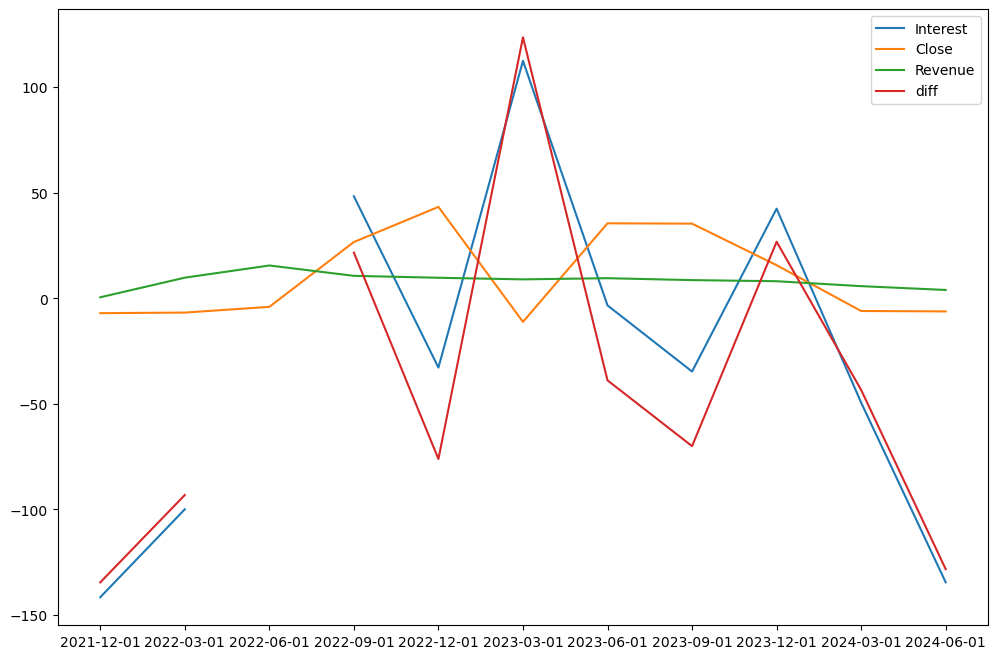

In [285]:
# pd.DataFrame(analysis).plot()
plt.figure(figsize=(12, 8))
plt.plot(analysis_df)
plt.legend(analysis_df);

In [286]:
analysis_df

,Interest,Close,Revenue,diff
Date,,,,
2021-12-01,-141.689828,-7.052895,0.467290,-134.636933
2022-03-01,-100.000000,-6.775067,9.767442,-93.224933
2022-06-01,inf,-4.069772,15.536723,inf
2022-09-01,48.321168,26.666664,10.635697,21.654504
2022-12-01,-32.843137,43.301442,9.723757,-76.144579
2023-03-01,112.500000,-11.185310,8.962739,123.685310
2023-06-01,-3.376623,35.526311,9.519409,-38.902934
2023-09-01,-34.708090,35.367546,8.607595,-70.075636
2023-12-01,42.467051,15.676233,8.080808,26.790819
